<a href="https://colab.research.google.com/github/brycemcwilliams/research-papers/blob/master/deep_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/car-mpg.csv")  

pd.isnull(df).count()

mpg         398
cyl         398
disp        398
hp          398
wt          398
acc         398
yr          398
origin      398
car_type    398
car_name    398
dtype: int64

In [0]:
df = df.drop("car_name", axis=1)

In [40]:
# always look at the mean vs the median (50%)
# if the mean is on the right side of the median then you have outliers
# this can be seen by having a tail in your data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [41]:
temp = pd.DataFrame(df.hp.str.isdigit()) 
temp[temp.hp == False] 

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [0]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
# Replace them with nan and remove the records from the data frame that have "nan"
df = df.replace('?', np.nan)

In [0]:
# Since the question marks appear only in the "hp" columns, replace them with the median of the same column
df = df.apply(lambda x: x.fillna(x.median()), axis=0)

In [0]:
# While reading the data into dataframe, Pandas assigned the data type as object to column "hp" because of the question marks
# The column type continues to be same even after replacing the question marks with the median
# Convert the column type to float64
df.hp = df.hp.astype('float64')  # converting the hp column from object / string type to float

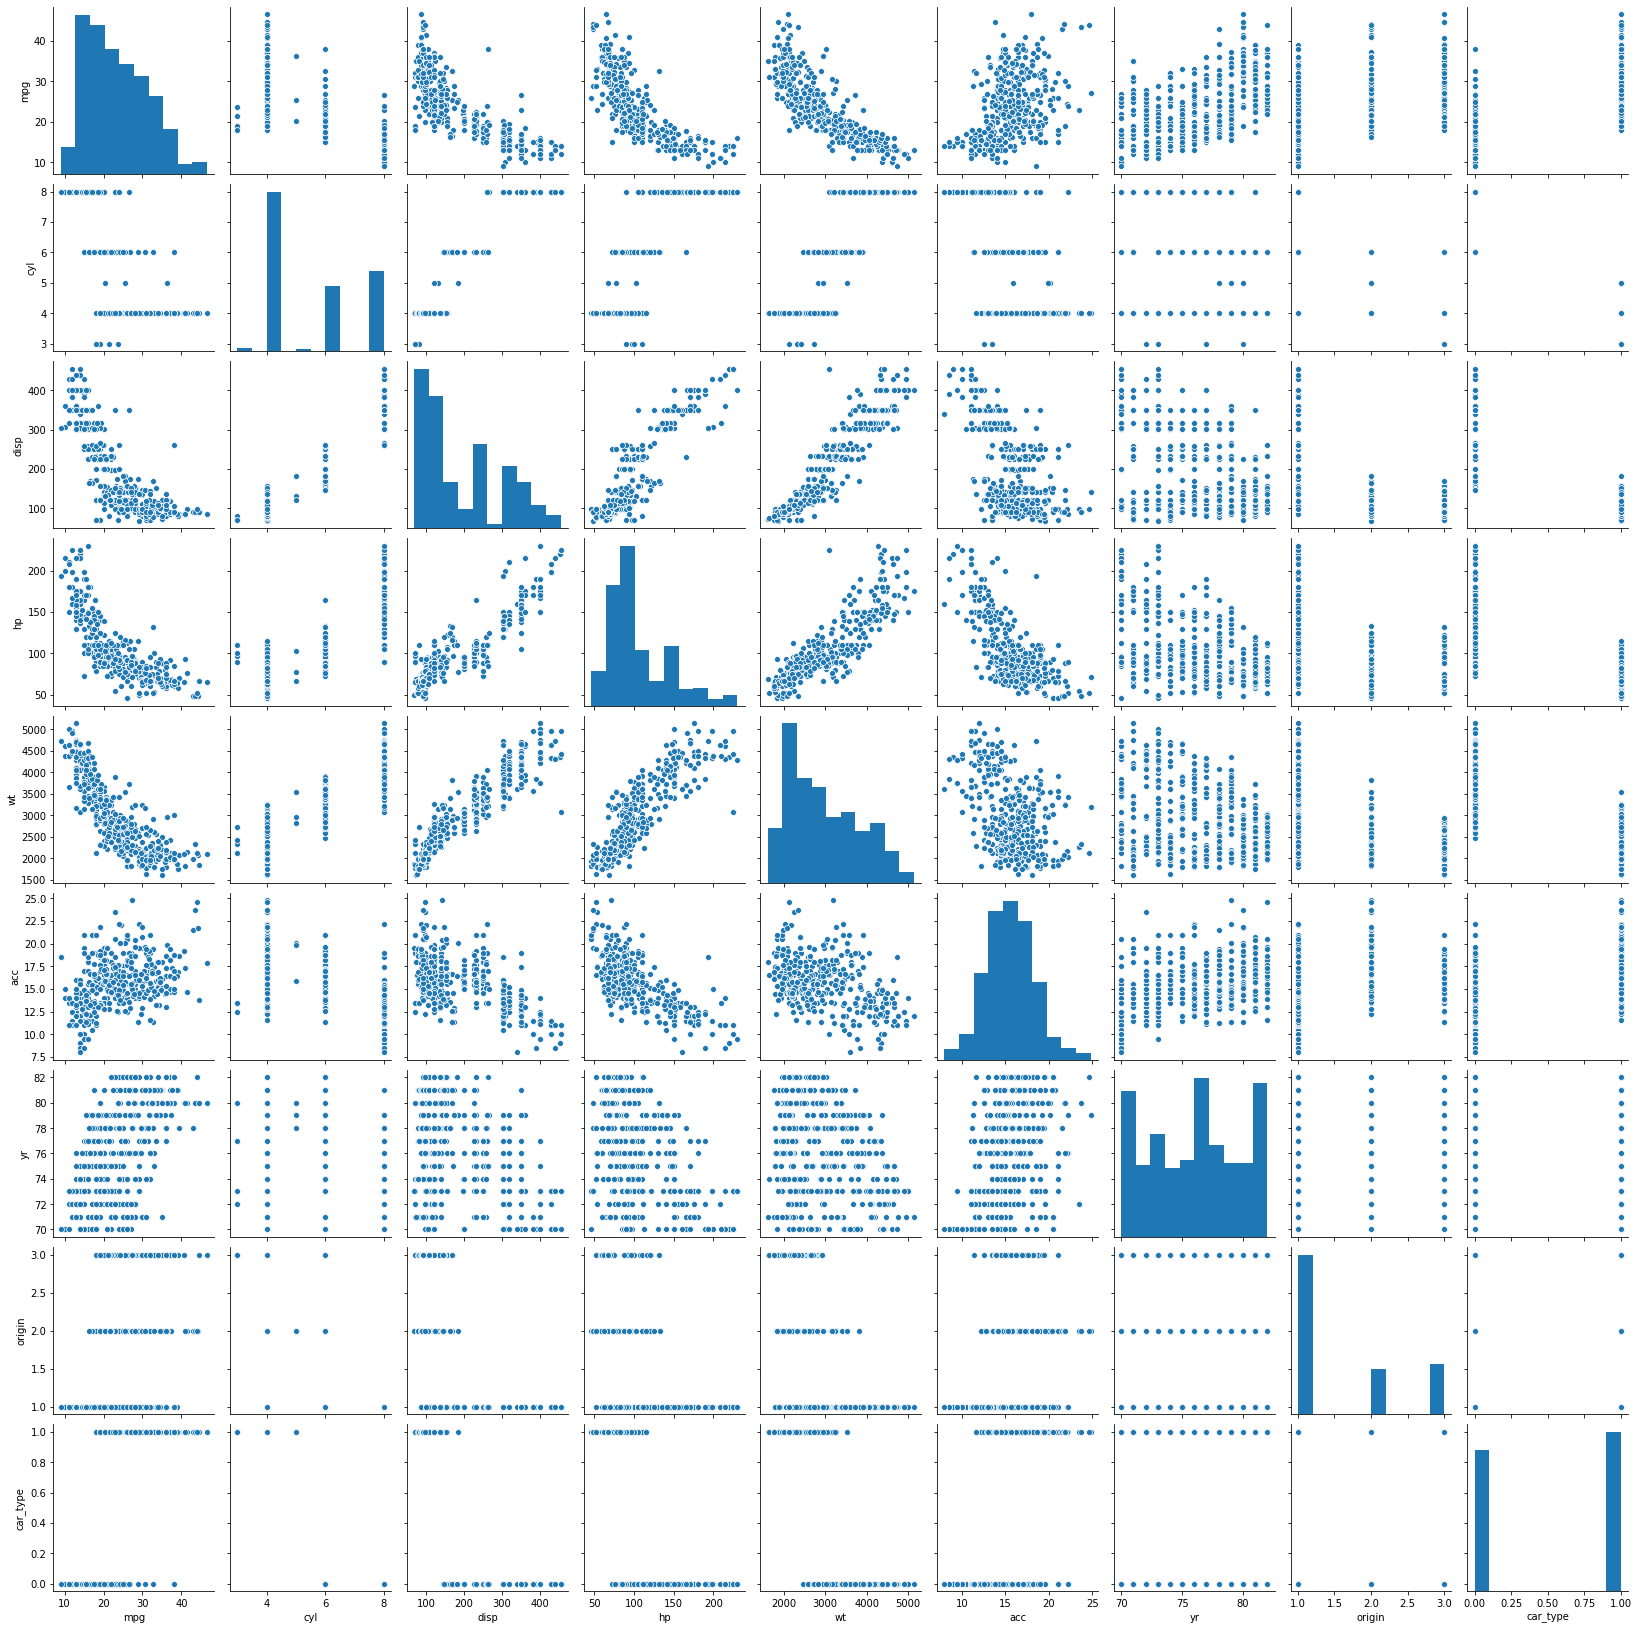

In [45]:
import seaborn as sns

sns.pairplot(data=df)

In [0]:
# convert origin to numric values (but that will introduce an order in that column)
df.origin = df.origin.map(lambda x: {1: 'usa', 2: 'europe', 3: 'japan'}.get(x))

In [0]:
# convert the numeric values to one-hot code to remove the order
df = pd.get_dummies(df, columns=['origin'])

In [48]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0,1


In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = df.iloc[:,1:8]

# Specify the target labels and flatten array
y = df.mpg

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Deep Neural Network

In [113]:
# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_cols = X_train.shape[0]
print(num_cols)

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
#model.add(Dense(10, activation='relu', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(1))

278


In [0]:
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(
  loss='mean_squared_error',
  optimizer=optimizer,
  metrics=['mae', 'mse']
)
                   
epochs = 15

In [115]:
tf.keras.backend.set_floatx('float64')
history = model.fit(
    X_train,
    y_train,
    epochs = epochs,
    validation_split = 0.2,
    verbose = False
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

          loss        mae         mse    val_loss    val_mae     val_mse  epoch
0   579.485575  22.734869  579.485582  585.709987  22.997513  585.709987      0
1   522.878612  21.521124  522.878607  518.891593  21.586572  518.891596      1
2   453.425814  19.950155  453.425800  437.035884  19.716709  437.035878      2
3   371.410595  17.870798  371.410597  345.369437  17.369576  345.369449      3
4   283.171648  15.351391  283.171649  252.573393  14.566632  252.573386      4
5   198.987467  12.615337  198.987463  169.476015  11.636047  169.476018      5
6   128.721213   9.865112  128.721216  106.730699   8.799060  106.730702      6
7    83.266233   7.761950   83.266232   68.685502   6.540750   68.685500      7
8    57.465184   6.145738   57.465185   53.206879   5.551112   53.206879      8
9    48.045753   5.509103   48.045755   49.265971   5.433800   49.265971      9
10   44.558702   5.246715   44.558703   46.727546   5.329026   46.727544     10
11   40.380638   4.973312   40.380639   

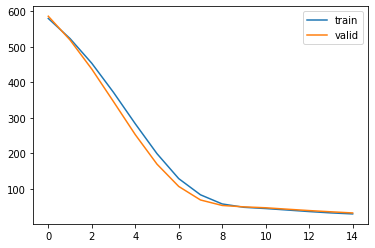

In [116]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train", "valid"), loc = 0)

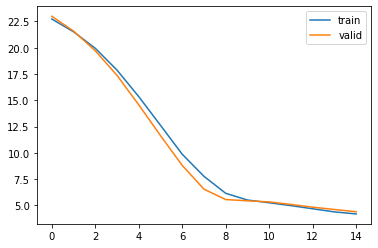

In [117]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train", "valid"), loc = 0)

In [110]:
loss = model.evaluate(X_test, y_test, verbose = False)
print(loss)

[8.31977128982544, 2.139594759614302, 8.31977115220095]


In [0]:
y_pred = np.round(model.predict(X_test))

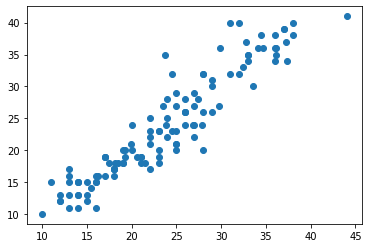

In [112]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)